In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import scipy as sp


In [4]:
def polynomial(x, coeffs):
    return sum([coeffs[i] * x ** i for i in range(len(coeffs))])

In [5]:
random.seed(200)
coeff_10= [random.uniform(-1,1) for i in range(11)]
coeff_50= [random.uniform(-1,1) for i in range(51)]

In [6]:
def generate_data(coeff_10,n,s):
        n=int(n)
        x = np.array([random.uniform(-1,1) for i in range(n)])
        polynomial_10 = polynomial(x, coeff_10)+np.random.normal(0,s,len(x))
        return x,polynomial_10



In [7]:
test_x=np.array([random.uniform(-1,1) for i in range(10)])



In [8]:
def overfit_measure(n,s,test_x):
    x,polynomial_10 = generate_data(coeff_10,n,s)
    test_polynomial_10 = polynomial(test_x, coeff_10)+np.random.normal(0,s,len(test_x))
    x = x[:, np.newaxis]
    polynomial_10 = polynomial_10[:, np.newaxis]
    polynomial_features_10= PolynomialFeatures(degree=10)
    x_poly_10 = polynomial_features_10.fit_transform(x)

    model_10 = LinearRegression()
    model_10.fit(x_poly_10, polynomial_10)
    polynomial_features_2= PolynomialFeatures(degree=2)
    x_poly_2 = polynomial_features_2.fit_transform(x)

    model_2 = LinearRegression()
    model_2.fit(x_poly_2, polynomial_10)
    test_x=test_x[:, np.newaxis]
    x_test_poly_10 = polynomial_features_10.fit_transform(test_x)
    x_test_poly_2 = polynomial_features_2.fit_transform(test_x)
    E_out_10=np.mean((test_polynomial_10-model_10.predict(x_test_poly_10))**2)
    E_out_2=np.mean((test_polynomial_10-model_2.predict(x_test_poly_2))**2)
    return E_out_10-E_out_2

In [9]:
n=np.arange(1,150,10)
s=np.arange(0,0.4,0.01)
        

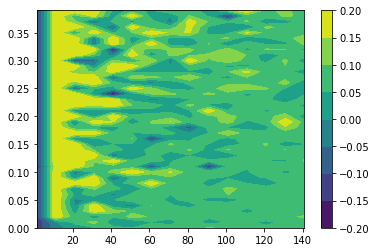

In [10]:
x,y=np.meshgrid(n,s)
z=np.array([overfit_measure(x,y,test_x) for x,y in zip(np.ravel(x),np.ravel(y))])
z[z>=2]=2
z=0.4*(z-min(z))/(max(z)-min(z))-0.2
plt.contourf(x,y,z.reshape(x.shape))
plt.colorbar()


In [17]:
def pow_overfit(n,p,test_x):
    test_polynomial_50 = polynomial(test_x, coeff_50)
    x = np.array([random.uniform(-1,1) for i in range(n)])
    polynomial_p = polynomial(x,coeff_50)
    x=x[:,np.newaxis]
    polynomial_p = polynomial_p[:, np.newaxis]
    polynomial_features= PolynomialFeatures(degree=p)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, polynomial_p)
    polynomial_features_2= PolynomialFeatures(degree=2)
    x_poly_2 = polynomial_features_2.fit_transform(x)

    model_2 = LinearRegression()
    model_2.fit(x_poly_2, polynomial_p)
    test_x=test_x[:, np.newaxis]
    x_test_poly = polynomial_features.fit_transform(test_x)
    x_test_poly_2 = polynomial_features_2.fit_transform(test_x)
    E_out_10=np.mean((test_polynomial_50-model.predict(x_test_poly))**2)
    E_out_2=np.mean((test_polynomial_50-model_2.predict(x_test_poly_2))**2)
    return E_out_10-E_out_2
    

In [12]:
n=np.arange(1,150,10)
p=np.arange(1,100,1)

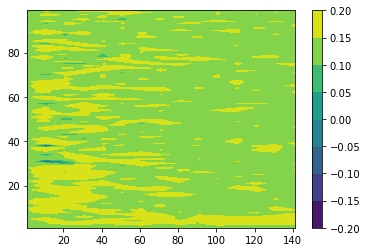

In [18]:
x,y=np.meshgrid(n,p)
z=np.array([pow_overfit(x,y,test_x) for x,y in zip(np.ravel(x),np.ravel(y))])
z[z>=2]=2
z=0.4*(z-min(z))/(max(z)-min(z))-0.2
plt.contourf(x,y,z.reshape(x.shape))
plt.colorbar()